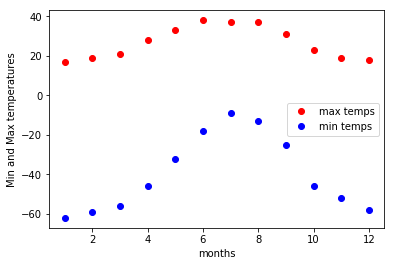

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
temp_max = np.array([17,19,21,28,33,38,37,37,31,23,19,18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9,-13, -25,-46, -52, -58])
months = np.arange(1,13,1)

plt.plot(months, temp_max, 'ro', label='max temps')
plt.plot(months, temp_min, 'bo', label='min temps')
plt.legend()
plt.xlabel('months')
plt.ylabel('Min and Max temperatures')

In [6]:
#Curve fitting
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos(( times + time_offset) * 2 * np.pi/times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20,10,0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [40,20,0])

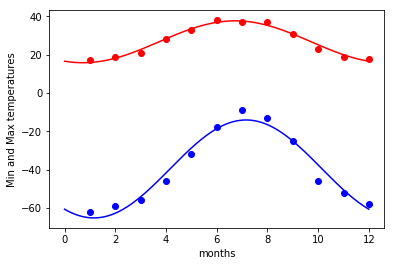

In [7]:
#Plotting 
days = np.linspace(0,12,num=365)
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('months')
plt.ylabel('Min and Max temperatures')

In [8]:
# Optimization of two-parameter function

def sixhump(x):
    return ((4-2.1*x[0]**2 + x[0]**4/3.)*x[0]**2 + x[0]*x[1] + (-4 + 4*x[1]**2)*x[1]**2)

#Make a grid to evaluate the function (for plotiing)
x = np.linspace(-2,2)
y = np.linspace(-1,1)
xg, yg = np.meshgrid(x,y)



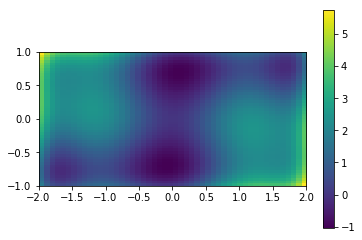

In [9]:
#Simple Visualization
plt.imshow(sixhump([xg,yg]), extent = [-2,2,-1,1])
plt.colorbar()

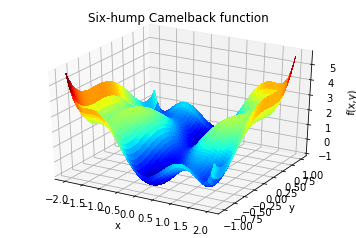

In [10]:
# A 3D surface plot for the function

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg,yg, sixhump([xg,yg]), rstride=1, cstride=1, cmap=plt.cm.jet, 
                      linewidth = 0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Six-hump Camelback function')

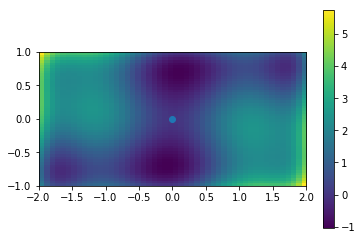

In [11]:
#Find the minima
from scipy import optimize
x_min = optimize.minimize(sixhump, x0=[0,0])

plt.figure()
plt.imshow(sixhump([xg,yg]), extent=[-2,2,-1,1])
plt.colorbar()

plt.scatter(x_min.x[0], x_min.x[1])


In [23]:
gamma_samples = np.random.gamma(1, size=1000)
bins = np.arange(-7,8)
print(bins)
histogram = np.histogram(gamma_samples, bins=xval, normed=True)[0]

bins = 0.5*(bins[1:]+bins[:-1])

print(bins)

[-7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7]
[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]


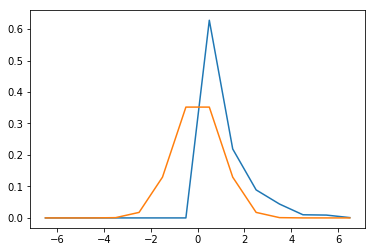

In [24]:
from scipy import stats
pdf = stats.norm.pdf(bins)
plt.plot(bins, histogram)
plt.plot(bins, pdf)

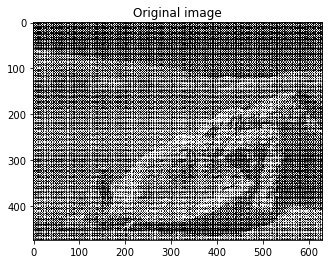

In [25]:
# Denoise an image by implementing a blur with an FFT
im = plt.imread('moonlanding.png').astype(float)
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

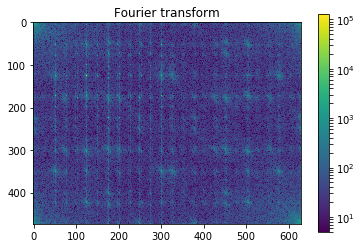

In [27]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

#show the result
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

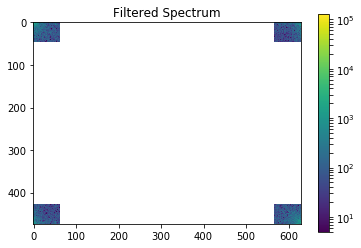

In [28]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

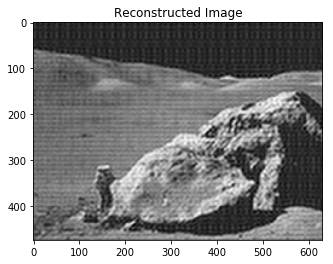

In [29]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

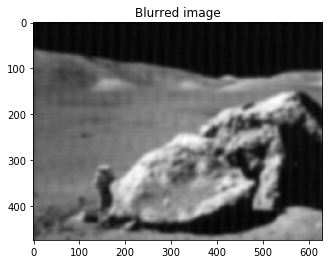

In [30]:
#Easier and better
#Implementing filtering directly with FFTs is tricky and time consuming. 
#We can use the Gaussian filter from scipy.ndimage

from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()

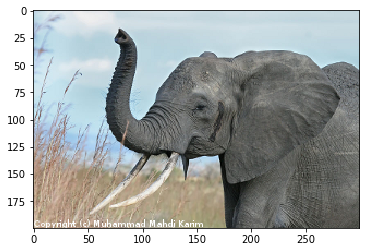

In [31]:
#Simple image blur by Convolution with Gaussian kernel

#read image
img = plt.imread('elephant.png')
plt.figure()
plt.imshow(img)

In [37]:
#Prepare a Gaussian convolution kernel

#First a 1-D Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
print(bump)
bump /= np.trapz(bump) #normalize the integral to 1

print(bump)

# make a 2-D kernel out of it
kernel = bump[:,np.newaxis]*bump[np.newaxis,:]
kernel

[  4.53999298e-05   1.71959413e-04   5.92221988e-04   1.85451737e-03
   5.28037885e-03   1.36705839e-02   3.21808007e-02   6.88802049e-02
   1.34054012e-01   2.37220930e-01   3.81692824e-01   5.58422344e-01
   7.42847013e-01   8.98511784e-01   9.88179807e-01   9.88179807e-01
   8.98511784e-01   7.42847013e-01   5.58422344e-01   3.81692824e-01
   2.37220930e-01   1.34054012e-01   6.88802049e-02   3.21808007e-02
   1.36705839e-02   5.28037885e-03   1.85451737e-03   5.92221988e-04
   1.71959413e-04   4.53999298e-05]
[  5.58619573e-06   2.11585997e-05   7.28694507e-05   2.28187512e-04
   6.49719723e-04   1.68208536e-03   3.95965924e-03   8.47530621e-03
   1.64945619e-02   2.91886475e-02   4.69650688e-02   6.87106022e-02
   9.14029787e-02   1.10556618e-01   1.21589744e-01   1.21589744e-01
   1.10556618e-01   9.14029787e-02   6.87106022e-02   4.69650688e-02
   2.91886475e-02   1.64945619e-02   8.47530621e-03   3.95965924e-03
   1.68208536e-03   6.49719723e-04   2.28187512e-04   7.28694507e-0

array([[  3.12055828e-11,   1.18196079e-10,   4.07063015e-10,
          1.27470010e-09,   3.62946155e-09,   9.39645807e-09,
          2.21194316e-08,   4.73447194e-08,   9.21418511e-08,
          1.63053498e-07,   2.62356067e-07,   3.83830873e-07,
          5.10594930e-07,   6.17590908e-07,   6.79224108e-07,
          6.79224108e-07,   6.17590908e-07,   5.10594930e-07,
          3.83830873e-07,   2.62356067e-07,   1.63053498e-07,
          9.21418511e-08,   4.73447194e-08,   2.21194316e-08,
          9.39645807e-09,   3.62946155e-09,   1.27470010e-09,
          4.07063015e-10,   1.18196079e-10,   3.12055828e-11],
       [  1.18196079e-10,   4.47686339e-10,   1.54181554e-09,
          4.82812820e-09,   1.37471595e-08,   3.55905707e-08,
          8.37808447e-08,   1.79325611e-07,   3.49001831e-07,
          6.17590908e-07,   9.93715088e-07,   1.45382012e-06,
          1.93395903e-06,   2.33922322e-06,   2.57266871e-06,
          2.57266871e-06,   2.33922322e-06,   1.93395903e-06,
       

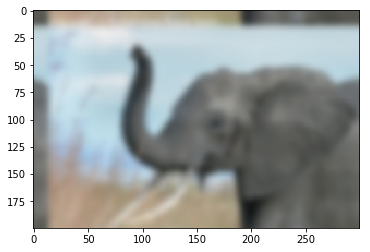

In [40]:
# Implement convoluiton via FFT
# Padded fourier transform, with the same shape as the image
# We use :func:`scipy.signal.fftpack.fft2` to have a 2D FFT

kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0,1))

#convolve
img_ft = fftpack.fft2(img, axes=(0,1))

#the 'newaxis' is to match the color direction
img2_ft = kernel_ft[:,:,np.newaxis]*img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0,1)).real

#clip values to range
img2 = np.clip(img2,0,1)

#plot output
plt.figure()
plt.imshow(img2)

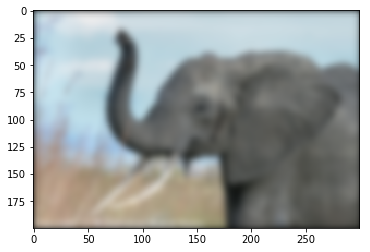

In [43]:
# A function to do this: scipy.signal.fftconvolove()
from scipy import signal
# mode='same' is there to enforce the same output shape as input arrays
# (ie avoid border effects)
img3 = signal.fftconvolve(img, kernel[:,:,np.newaxis], mode='same')

plt.figure()
plt.imshow(img3)

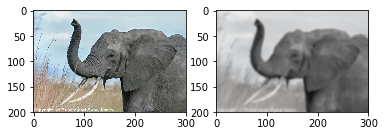

In [48]:
from scipy.ndimage import gaussian_filter
img_gauss = gaussian_filter(img, sigma=2)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img)
ax2.imshow(img_gauss)

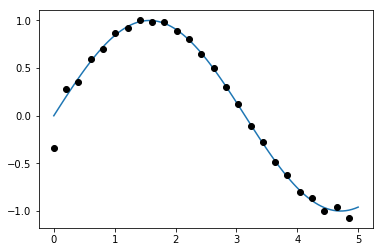

In [49]:
t = np.linspace(0,5,100)
x = np.sin(t)

from scipy import signal
x_resampled = signal.resample(x, 25)
plt.plot(t,x)
plt.plot(t[::4],x_resampled,'ko' )

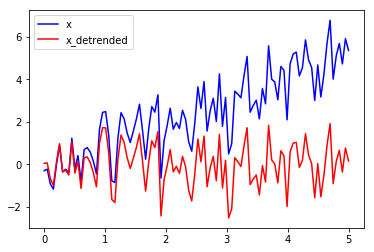

In [51]:
t = np.linspace(0,5,100)
x = t + np.random.normal(size=100)

x_detrended = signal.detrend(x)
plt.plot(t,x,'b',label='x')
plt.plot(t, x_detrended, 'r', label='x_detrended')
plt.legend()

In [57]:
from scipy import misc
face = misc.face(gray=True)
print(face.shape)
from scipy import ndimage #Shift, rotate and zoom it
shifted_face = ndimage.shift(face, (50,50))
shifted_face2 = ndimage.shift(face, (50,50), mode='nearest')

rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
print(zoomed_face.shape)


(768, 1024)
(1536, 2048)


(-0.5, 2047.5, 1535.5, -0.5)

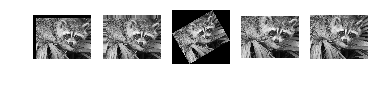

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.imshow(shifted_face, cmap=plt.cm.gray)
ax2.imshow(shifted_face2, cmap=plt.cm.gray)
ax3.imshow(rotated_face, cmap=plt.cm.gray)
ax4.imshow(cropped_face, cmap=plt.cm.gray)
ax5.imshow(zoomed_face, cmap=plt.cm.gray)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')

In [63]:
#Image filtering
#Generate noisy face
face = face[:512, -512:] #crop square on right

noisy_face = np.copy(face).astype(float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)


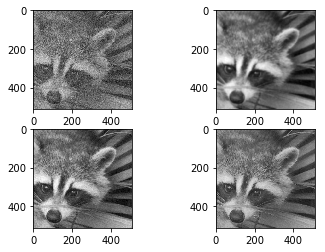

In [65]:
#Apply a variety of filters on it
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5,5))

plt.subplot(221)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.subplot(222)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.subplot(223)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.subplot(224)
plt.imshow(wiener_face, cmap=plt.cm.gray)

In [68]:
el = ndimage.generate_binary_structure(2,1)
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]], dtype=bool)

In [70]:
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


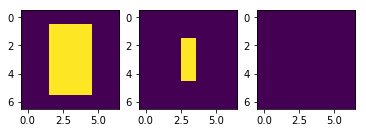

In [75]:
#Erosion
a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5]=1
print(a)
eroded = ndimage.binary_erosion(a).astype(a.dtype)
print(eroded)
eroded_again = ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)
print(eroded_again)
plt.subplot(131)
plt.imshow(a)
plt.subplot(132)
plt.imshow(eroded)
plt.subplot(133)
plt.imshow(eroded_again)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


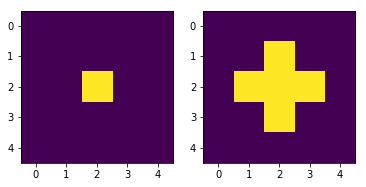

In [78]:
#Dilation
a = np.zeros((5,5))
a[2,2]=1
print(a)
dilated = ndimage.binary_dilation(a).astype(a.dtype)
print(dilated)
plt.subplot(121)
plt.imshow(a)
plt.subplot(122)
plt.imshow(dilated)

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 1]]
[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


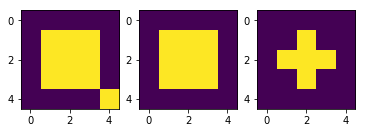

In [80]:
#Opening
a = np.zeros((5,5)).astype(np.int)
a[1:4,1:4]=1
a[4,4]=1
opened = ndimage.binary_opening(a, structure=np.ones((3,3))).astype(a.dtype) #remove small objects
print(a)
print(opened)
opened_again = ndimage.binary_opening(a).astype(a.dtype) # smotthens the corners
print(opened_again)
plt.subplot(131)
plt.imshow(a)
plt.subplot(132)
plt.imshow(opened)
plt.subplot(133)
plt.imshow(opened_again)


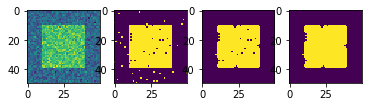

In [82]:
a = np.zeros((50,50))
a[10:-10, 10:-10]=1
a+= 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_maks = ndimage.binary_closing(opened_mask)
plt.subplot(141)
plt.imshow(a)
plt.subplot(142)
plt.imshow(mask)
plt.subplot(143)
plt.imshow(opened_mask)
plt.subplot(144)
plt.imshow(closed_maks)

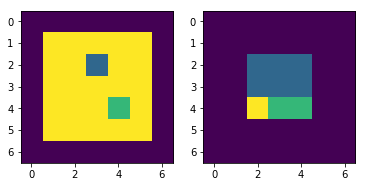

In [85]:
a = np.zeros((7,7)).astype(np.int)
a[1:6, 1:6]=3
a[4,4]=2; a[2,3]=1

gray_ero = ndimage.grey_erosion(a, size=(3,3))
plt.subplot(121)
plt.imshow(a)
plt.subplot(122)
plt.imshow(gray_ero)

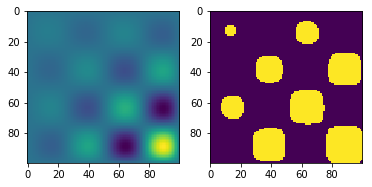

In [89]:
#Let us first generate a nice synthetic binary image.
x,y = np.indices((100,100))
sig = np.sin(2*np.pi*x/50.)*np.sin(2*np.pi*y/50.)*(1+x*y/50.**2)**2
mask = sig>1
plt.subplot(121)
plt.imshow(sig)
plt.subplot(122)
plt.imshow(mask)

8


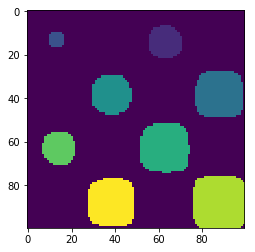

In [91]:
# assign a different label to each connected componenet
labels, nb = ndimage.label(mask)
print(nb)
plt.imshow(labels)

In [92]:
#Now compute measurements on each connected componenent
areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
print(areas)
maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
print(maxima)

[ 190.   45.  424.  278.  459.  190.  549.  424.]
[  1.80238238   1.13527605   5.51954079   2.49611818   6.71673619
   1.80238238  16.76547217   5.51954079]


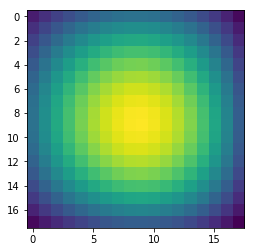

In [94]:
#Extract the 4th component, crop the array around it
sl = ndimage.find_objects(labels==4)
plt.imshow(sig[sl[0]])